#Understanding Support Vector Machines using Python

https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb#scrollTo=Ltlvy4v58vkZ

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

https://medium.com/cube-dev/support-vector-machines-tutorial-c1618e635e93



---



#Chapter 1: LINEAR SVM

##1A) Importing Libraries

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

##1B) Make Blobs (2 Colors)

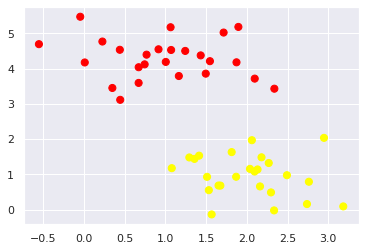

In [70]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

##1C) Try Classifying the 2 Colours using Lines

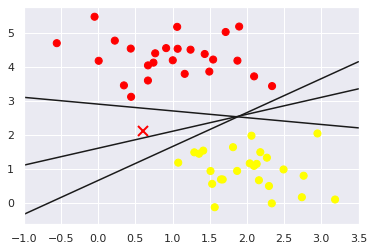

In [71]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

#If you try to draw a straight line separating the two sets of data, 
#there is more than one possible dividing line that can 
#perfectly discriminate between the two classes!

#Here we can draw 3 lines 
# What about "X" on the chart? Is it Classified Red or Yellow?
# It depends on which line you choose!

## 1D) Try Maximizing the *Margin*: to find the BEST LINE



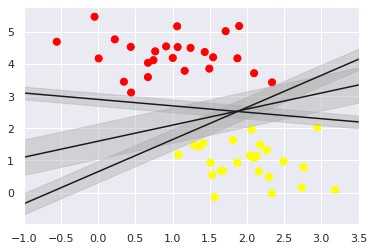

In [72]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

#The line that maximizes this MARGIN (the shaded grey area)
# is the BEST LINE (aka HYPERPLANE).

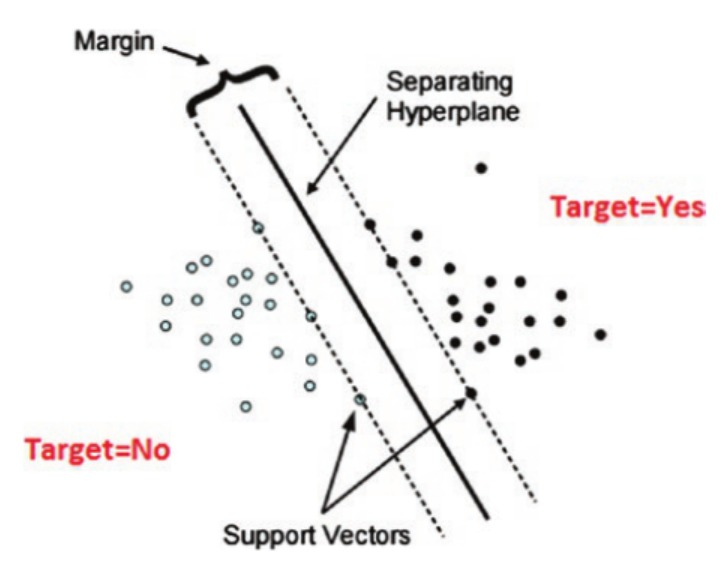

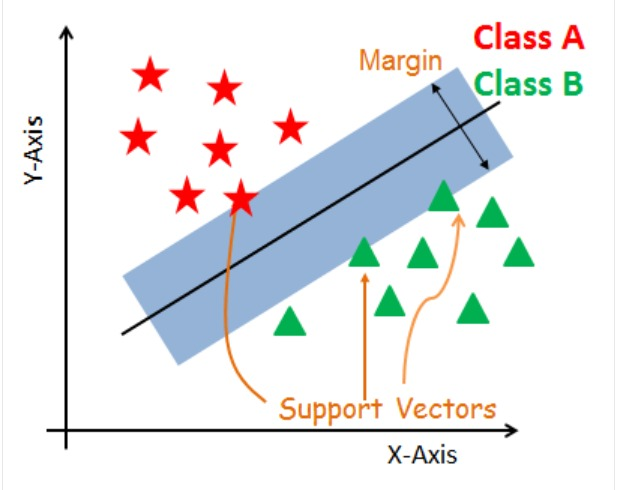



---



##1E) Fitting a Support Vector Machine (SVM)
- now that you have found the "BEST LINE" (hyperplane), its time to fit the SVM by searching the "Support Vectors" (which are simply the points that touch the OUTERMOST MARGINs)

In [73]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

#C is a REGULARIZATION hyperparameter that measures the "hardness" / "softness" 
#of the MARGIN... more about this will be explained later...
#for now, we just simply pick a super large C value...

SVC(C=10000000000.0, kernel='linear')

In [74]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

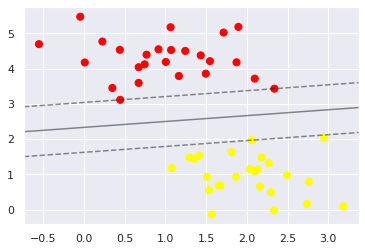

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

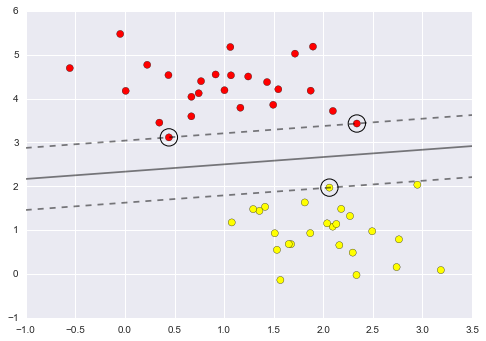

In [76]:
model.support_vectors_

#we see that the SVC.fit function automatically finds us the 
#3 Support Vector locations (circled black)
# (0.44, 3.31)
# (2.33, 3.43)
# (2.06, 1.97)

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])



---



##1F) Tuning the C: Softening the Margins

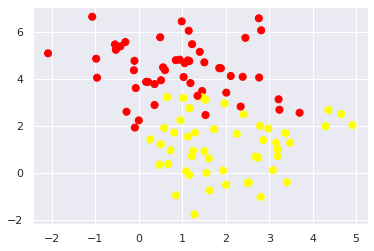

In [77]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

#What if your data has overlap?
#Example like this:

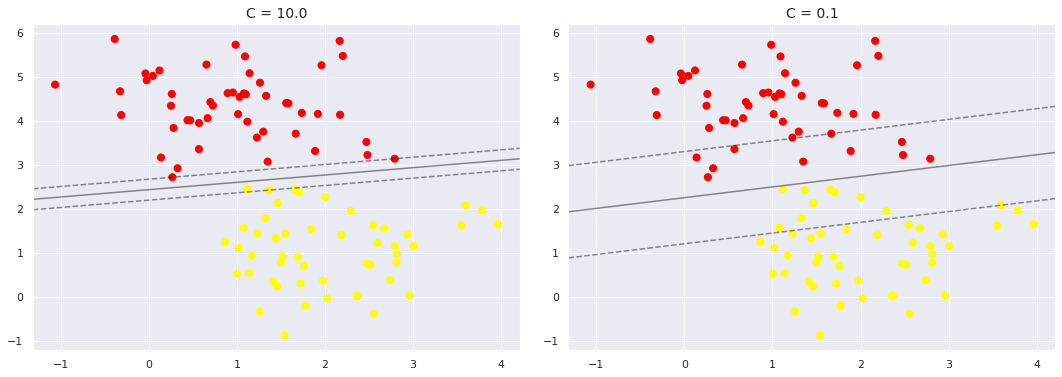

In [78]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [79]:
#For very large  C , the margin is hard, and points cannot lie in it.
#For smaller  C , the margin is softer, and can grow to encompass some points.

In [80]:
#Optimal  C  can be found via "Hyperparameter Search"

# C = Regularization Hyperparameter
#Model "Parameters" = Setup by Machine Automatically (Machine learnt from Data)
#"Hyperparameters" = Setup by Humans Manually

#Hyperparameter Tuning is covered in another manuscript, but basically 3 types:
#     Grid Search
#     Random Search
#     Bayes Search

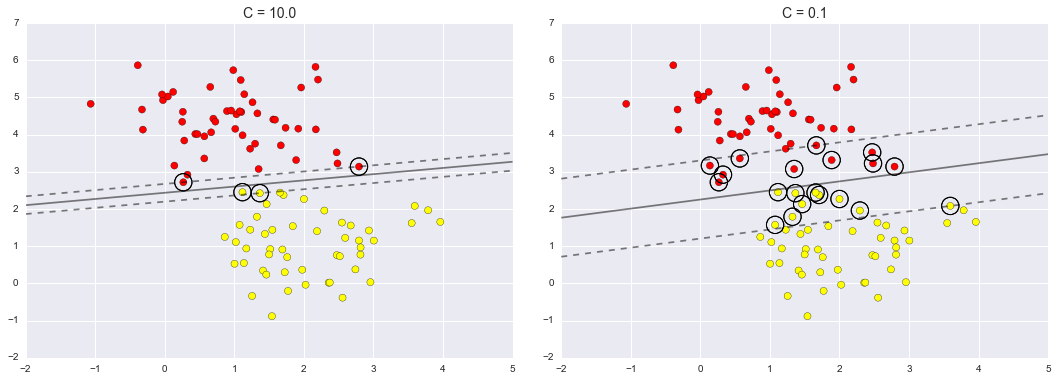



---



##1G) What if we Increased the Number of Blobs? ANSWER = NO DIFFERENCE

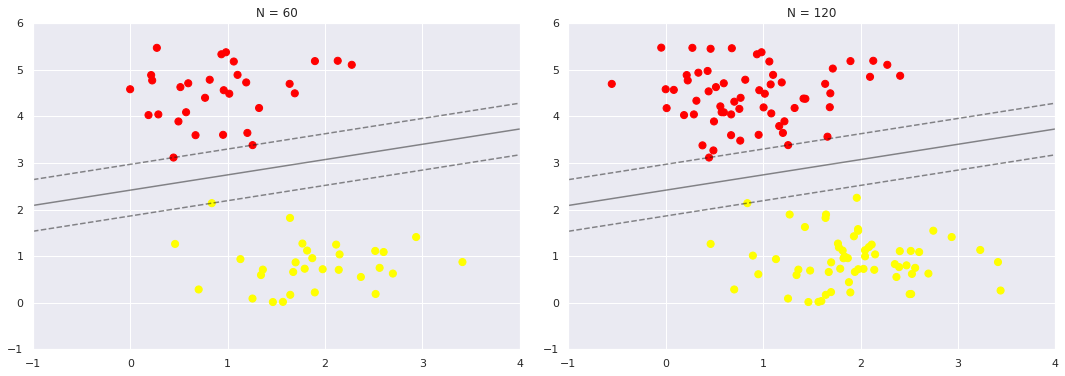

In [81]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#N = 60 blobs vs N = 120 blobs showed NO DIFFERENCE
#The Three Support Vectors remain the same.

In [82]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

#Whether N = 10 or 200, SVM remains the same.

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…



---



#Chapter 2: NON-LINEAR SVM

##2A) Taking a look at Non Linearly Seperable Data

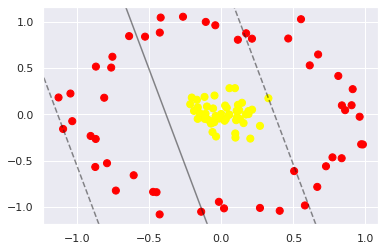

In [83]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
#trying to fit a LINEAR KERNEL to NON LINEARLY SEPERABLE DATA

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

#you can't! the LINEAR SVM draws those planes "anyhow"
#(u can try re-running this block of code and see that the SVM keeps trying
#out different lines.....)

#you see below that LINEAR KERNELS can't fit NON LINEAR Data
#You should be drawing a circle instead!

##2B) How to Solve Non-Linear Data? ANSWER = KERNEL TRICK

In [84]:
r = np.exp(-(X ** 2).sum(1))

#So how can we compute a radial basis function centered on the middle clump?
#ANSWER = KERNEL TRICK

# KERNEL TRICK = Projecting our data into higher-dimensional space 
# (defined by polynomials and Gaussian basis functions... 
# just ignore these terms for now...) 
# and thereby fitting NONLINEAR relationship with a linear classifier. 

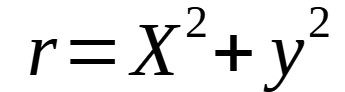

##2C) Visualizing the KERNEL TRICK

In [85]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
import matplotlib.pyplot as plt

import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-30, 30], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

# Kernel Trick "forced" the Yellow away from the Red
# in simple words, Kernel Trick converted Non Linearly Seperable Data
# to a Higher Dimension (3D - which is an equation of a circle)
#now you can "fit in" a Hyperplane between the Yellow and the Red!
#maybe slotting in at r = 0.7?

interactive(children=(Dropdown(description='elev', index=1, options=(-30, 30), value=30), IntSlider(value=30, …

##2D) Code for the KERNEL TRICK (kernel = 'rbf')

In [87]:
clf = SVC(kernel='rbf', C=1E6)
#NON LINEAR SVC kernel chosen is 'rbf'
#i.e. KERNEL TRICK = SVC Kernel 'rbf'

#once again choosing a very large C for "very hard margin"

clf.fit(X, y)
#fitting a NON LINEAR SVC to X and y

SVC(C=1000000.0)

##2E) Plotting the Non Linear Decision Boundary back to 2D

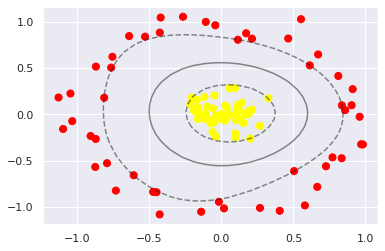

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

#the KERNEL TRICK learnt a suitable nonlinear decision boundary.

##2F) Conclusion

In [89]:
#In short, KERNEL trick can turn NON LINEAR DATA to LINEAR DATA
#by transposing them to a HIGHER DIMENSION

#Subsequently, it projects the decision boundary back to 
#the ORIGINAL DIMENSION again... and makes it linearly seperable.... 

#However, finding the correct transformation for any given dataset isn't easy
#Thankfully, SKLearn's SVM Kernel will automatically do it for us!

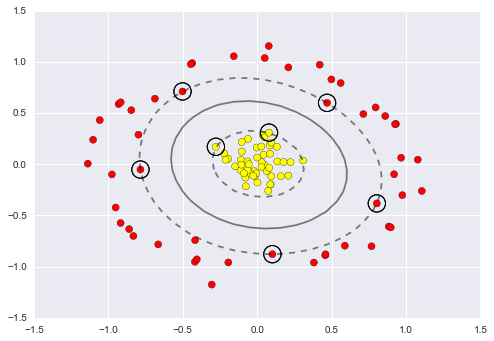



---



#THE END

---

